# Generating Synthetic data for 100 trials

This file goes over the process of generating a synthetic trial, your job is to replicate this process 100 times and store the results in json format on a text file for later processing.  Read the comments to get an idea about the missing code.



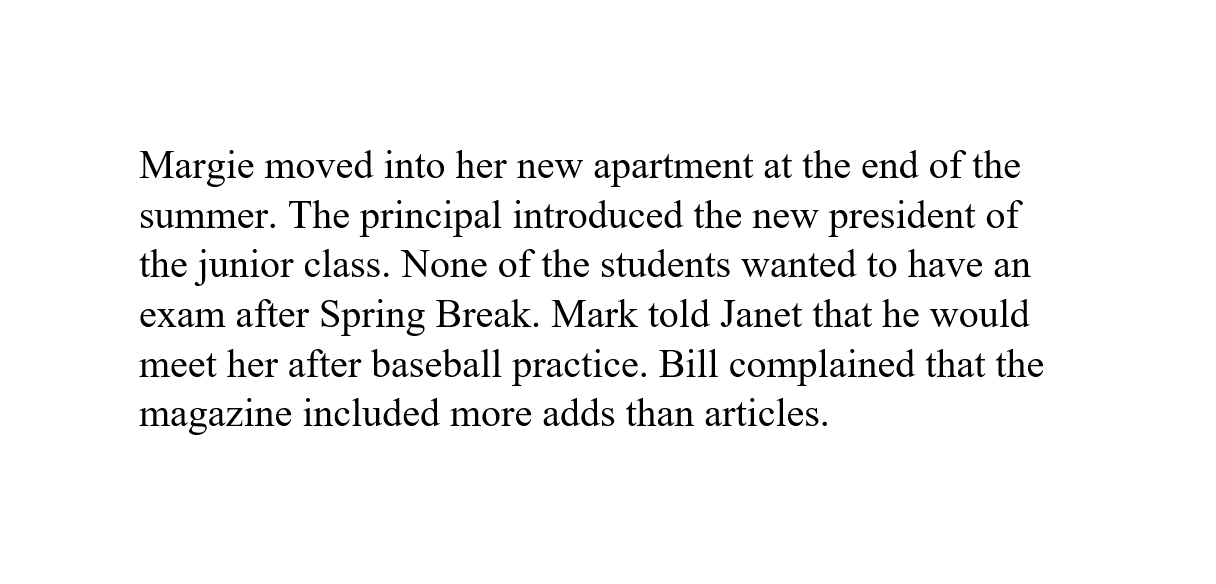

In [1]:
# just showing you the image of the text we will be using to generate fixations over

from IPython.display import Image

img = Image(filename='synthetic_text.png')
img

In [2]:
# yup, this is the same library we used last semester.  We call that foreshadowing :)

import emip_toolkit as EMTK

In [3]:
# generate areas of interest around each word, we will see a visualization of this in a second

image_path = "./"
image = "synthetic_text.png"
aoi = EMTK.find_aoi(image, image_path, level="sub-line")
aoi.head()

,kind,name,x,y,width,height,image
0,sub-line,line 1 part 1,137.5,147,119,44,synthetic_text.png
1,sub-line,line 1 part 2,262.5,147,114,44,synthetic_text.png
2,sub-line,line 1 part 3,382.5,147,65,44,synthetic_text.png
3,sub-line,line 1 part 4,453.5,147,57,44,synthetic_text.png
4,sub-line,line 1 part 5,514.5,147,72,44,synthetic_text.png


In [4]:
# we add the actual word associated with each area of interest (AOI)

file_path = "./"

aois_with_tokens = EMTK.add_tokens_to_AOIs(file_path, image.split(".")[0]+".txt", aoi)
aois_with_tokens.head()

,kind,name,x,y,width,height,image,token
0,sub-line,line 1 part 1,137.5,147,119,44,synthetic_text.png,Margie
1,sub-line,line 1 part 2,262.5,147,114,44,synthetic_text.png,moved
2,sub-line,line 1 part 3,382.5,147,65,44,synthetic_text.png,into
3,sub-line,line 1 part 4,453.5,147,57,44,synthetic_text.png,her
4,sub-line,line 1 part 5,514.5,147,72,44,synthetic_text.png,new


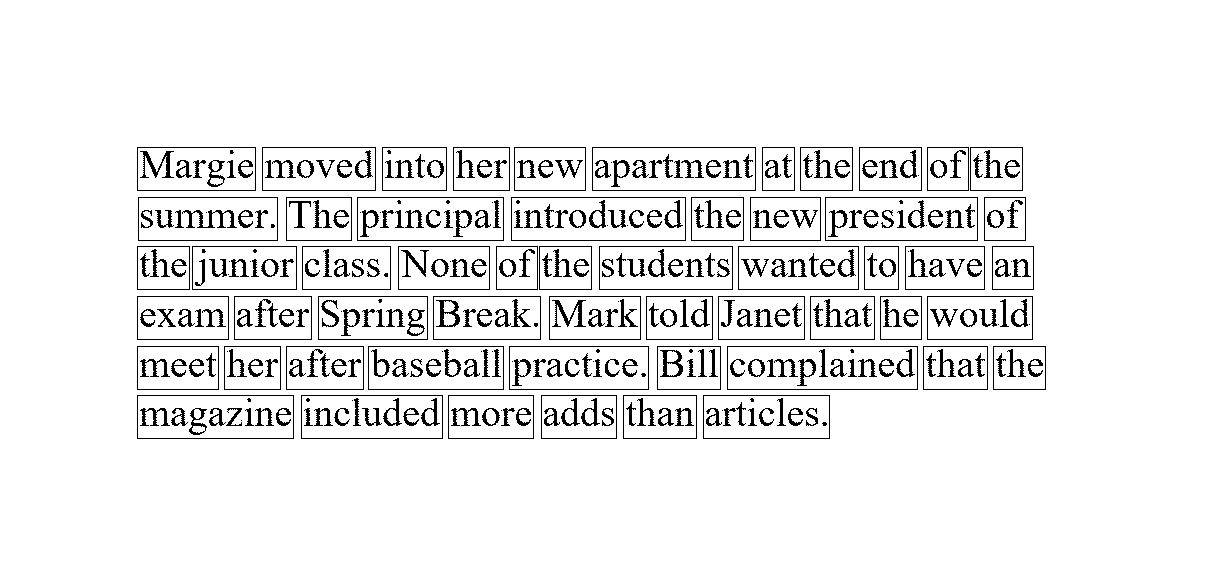

In [5]:
# finally, a visualization of the areas of interest (AOIs) around words!

EMTK.draw_aoi(aoi, image, image_path)

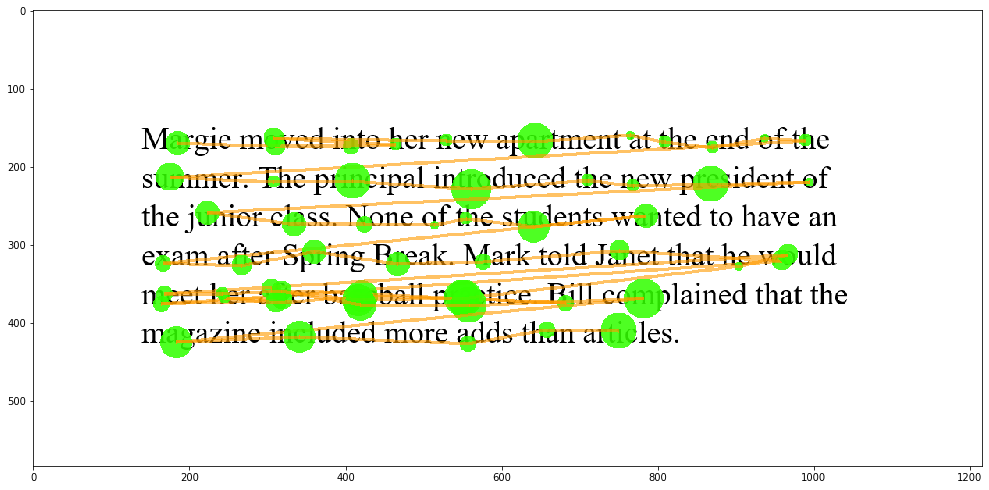

In [6]:
# this is the file you will work on a lot this project

import correction

# generating a synthetic trial
synth_fixations = correction.generate_fixations_left_skip_regression(aois_with_tokens)

# drawing the synthetic data!
correction.draw_fixation('synthetic_text.png', synth_fixations)

# Generating a synthetic dataset with 100 readers:

Look at that, we did something cool!  Now that we know how to generate a single snythetic trial, let's generate 100 and store them in a text file called "synthetic_dataset_with_time.txt" in json format.  I will guide you through the steps using the comments!

In [7]:
data = {}

# loop 100 times maintaining a variable called index
for index in range(100):

    # generate a synthetic trial using similar code to the one above
    synth_fixations = correction.generate_fixations_left_skip_regression(aois_with_tokens)
    data["robot"+str(index)] = synth_fixations
    
    # store the trial in the dictionary called "data" where the key is "robot" + str(index)
    


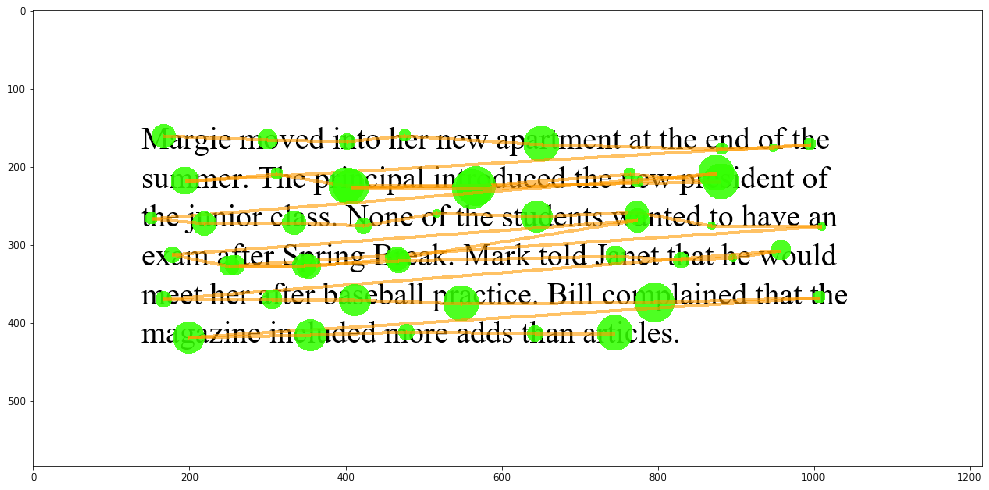

In [9]:
# check that the data looks correct
correction.draw_fixation('synthetic_text.png', data["robot1"])

In [10]:
# convert data into json format, then store it in a text file called "synthetic_dataset_with_time.txt"
import json

with open("synthetic_dataset_with_time.txt", "w+") as outfile:
    output = json.dumps(data)
    outfile.write(output)


That should be it, don't overthink it!  You did great by the way, I can see you, its one of my supernatural abilities.